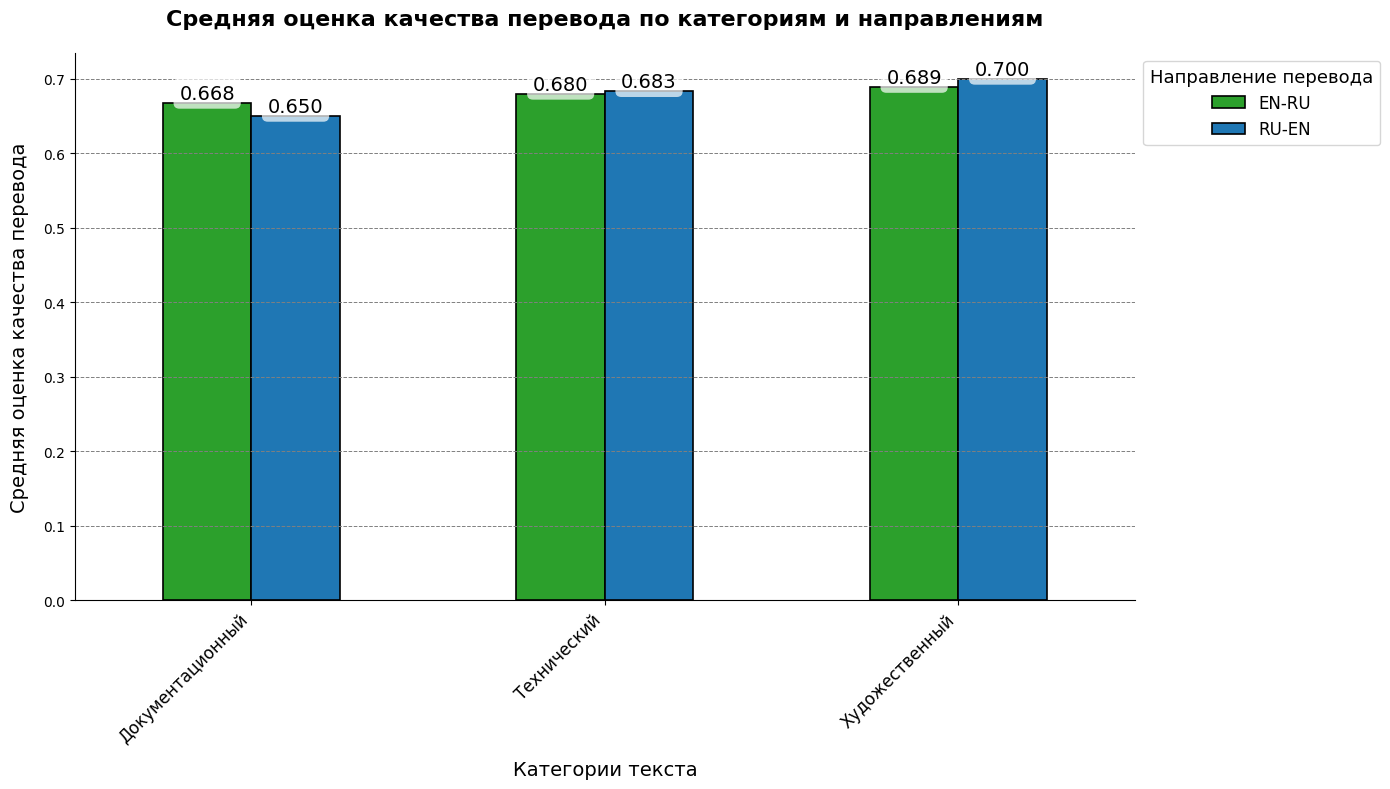


Средняя оценка качества перевода по категориям и направлениям:

Документационный (EN-RU): 0.668
Документационный (RU-EN): 0.650
Технический (EN-RU): 0.680
Технический (RU-EN): 0.683
Художественный (EN-RU): 0.689
Художественный (RU-EN): 0.700


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных из CSV
df = pd.read_csv("data.csv")

# Отфильтровываем данные только для нужных категорий
filtered_df = df[df['Категория'].isin(['Художественный', 'Технический', 'Документационный'])]

# Группируем по категории, направлениям перевода и вычисляем среднее для оценки качества перевода
category_scores = filtered_df.groupby(['Категория', 'Направление перевода'])['Оценка качества перевода'].mean().unstack()

# Построение комбинированной столбчатой диаграммы
fig, ax = plt.subplots(figsize=(14, 8))
colors = ['#2ca02c', '#1f77b4']  # Зелёный и синий
bars = category_scores.plot(kind='bar', ax=ax, color=colors, edgecolor='black', linewidth=1.2)

# Добавляем значения над каждым столбцом с обводкой для улучшенной видимости
for bar in bars.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f"{height:.3f}", ha='center', va='bottom', fontsize=14, color='black',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))

# Настройка графика
ax.set_xlabel('Категории текста', fontsize=14, labelpad=10)
ax.set_ylabel('Средняя оценка качества перевода', fontsize=14, labelpad=10)
ax.set_title('Средняя оценка качества перевода по категориям и направлениям', fontsize=16, fontweight='bold', pad=20)
ax.set_xticklabels(category_scores.index, rotation=45, ha='right', fontsize=12)
ax.legend(title="Направление перевода", loc='upper left', bbox_to_anchor=(1, 1), fontsize=12, title_fontsize='13')

# Убираем верхнюю и правую границы графика
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Добавляем сетку по оси y
ax.yaxis.grid(True, linestyle='--', linewidth=0.7, color='gray')
ax.xaxis.grid(False)

plt.tight_layout()
plt.show()

# Вывод текстовых данных под графиком
print("\nСредняя оценка качества перевода по категориям и направлениям:\n")
for category in category_scores.index:
    scores = category_scores.loc[category]
    for direction in scores.index:
        print(f"{category} ({direction}): {scores[direction]:.3f}")
